In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("charging_logs.csv")

In [4]:
print(df.shape)
print(df.head())

(199566, 11)
  station_id            timestamp    session_id  voltage  current  power_kw  \
0  STATION_8  2024-01-01 00:05:42  c2b7363e06d4   229.04    27.75     6.394   
1  STATION_8  2024-01-01 00:05:44  c2b7363e06d4   227.89    27.09     6.060   
2  STATION_8  2024-01-01 00:05:46  c2b7363e06d4   228.11    26.36     6.024   
3  STATION_8  2024-01-01 00:05:50  c2b7363e06d4   222.83    27.57     6.191   
4  STATION_8  2024-01-01 00:05:51  c2b7363e06d4   230.27    28.71     6.533   

   temperature_c  duration_sec  energy_kwh  error_code message  
0          37.32            59      0.1048           0      OK  
1          33.31            46      0.0774           0      OK  
2          32.84            22      0.0368           0      OK  
3          34.84             2      0.0034           0      OK  
4          36.16            33      0.0599           0      OK  


In [5]:
df.describe()

,voltage,current,power_kw,temperature_c,duration_sec,energy_kwh,error_code
count,199566.000000,199566.000000,199566.000000,199566.000000,199566.000000,199566.000000,199566.000000
mean,228.673612,30.155888,6.857442,45.098211,30.506148,0.059947,1.406953
std,12.986328,3.738580,1.239568,6.033277,17.334014,0.039588,20.611661
min,88.710000,0.000000,-8.924000,-8.450000,1.000000,0.001300,0.000000
25%,224.210000,28.230000,6.439000,41.750000,16.000000,0.029800,0.000000
50%,227.950000,30.420000,6.936000,45.810000,30.000000,0.058400,0.000000
75%,232.240000,32.430000,7.416000,48.920000,46.000000,0.087200,0.000000
max,390.960000,41.700000,9.610000,93.980000,60.000000,0.697900,404.000000


In [6]:
df.isnull().sum()

station_id       0
timestamp        0
session_id       0
voltage          0
current          0
power_kw         0
temperature_c    0
duration_sec     0
energy_kwh       0
error_code       0
message          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
print("Negative power rows:", (df['power_kw'] < 0).sum())

print("Negative temperature rows:", (df['temperature_c'] < 0).sum())

print("Voltage below 150 rows:", (df['voltage'] < 150).sum())

print("Voltage above 260 rows:", (df['voltage'] > 260).sum())

Negative power rows: 1103
Negative temperature rows: 31
Voltage below 150 rows: 953
Voltage above 260 rows: 1167


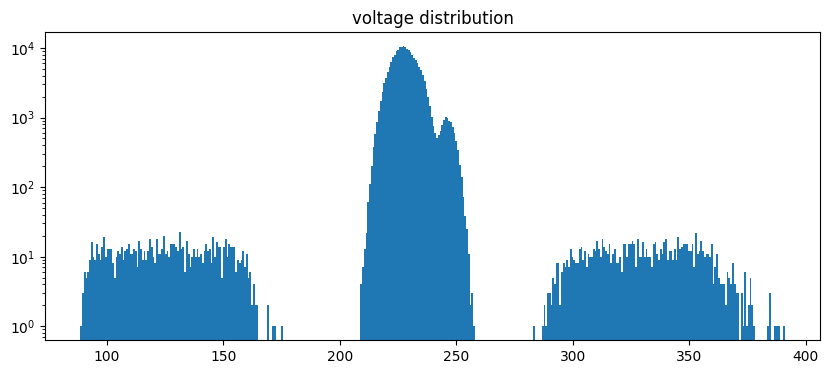

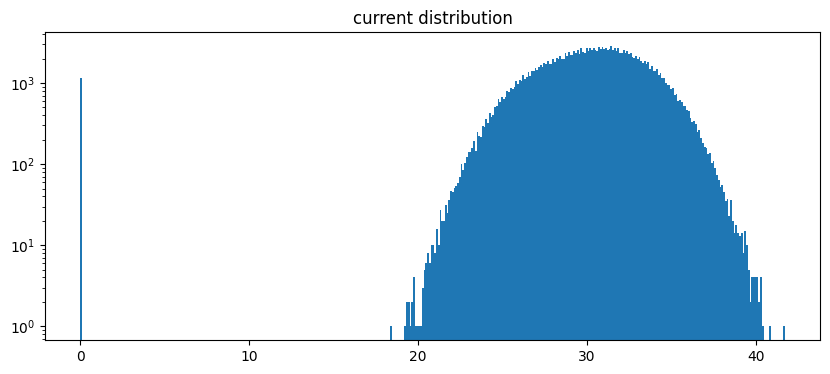

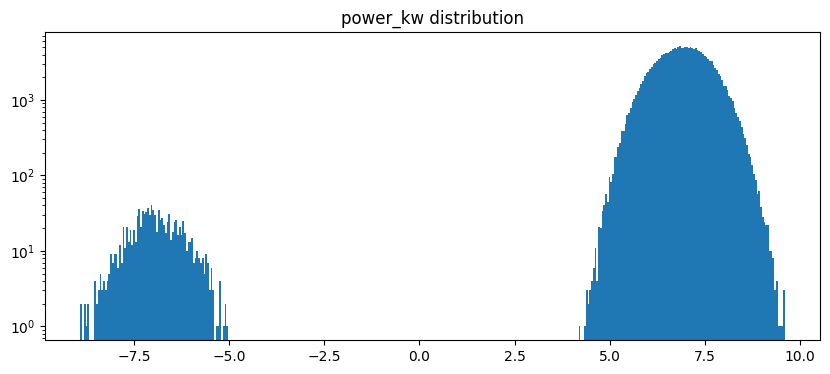

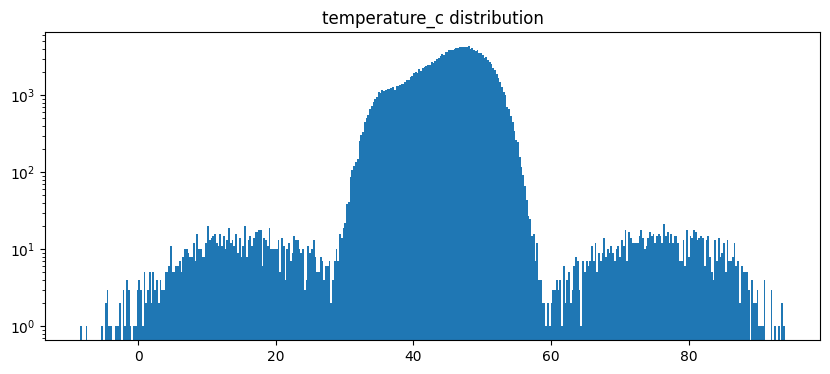

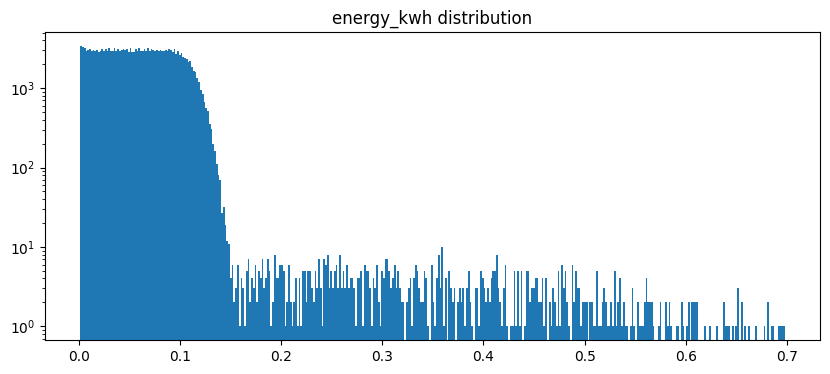

In [9]:
import matplotlib.pyplot as plt

cols = ['voltage','current','power_kw','temperature_c','energy_kwh']

for col in cols:
    plt.figure(figsize=(10,4))
    plt.hist(df[col], bins=400,log=True)
    plt.title(f"{col} distribution")
    plt.show()

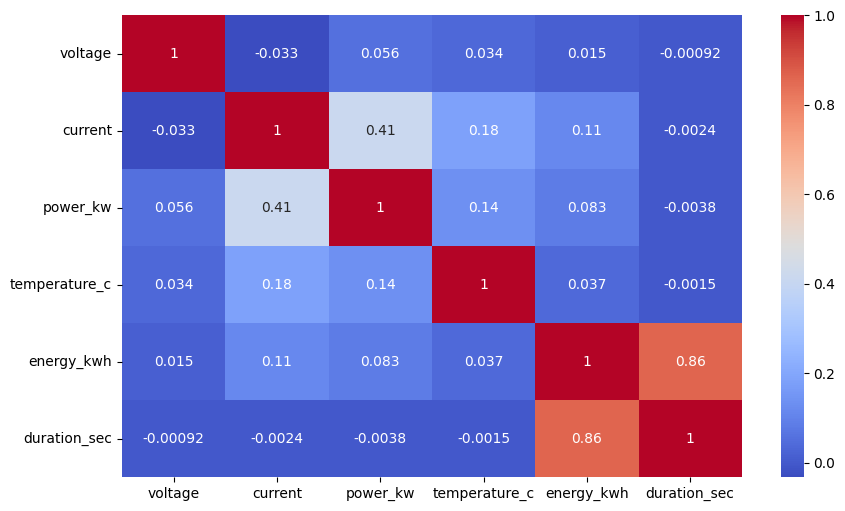

In [10]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[['voltage','current','power_kw','temperature_c','energy_kwh','duration_sec']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

In [12]:
df['station_id'].value_counts()

station_id
STATION_18    10298
STATION_3     10268
STATION_4     10227
STATION_8     10118
STATION_12    10105
STATION_9     10080
STATION_17    10063
STATION_11    10017
STATION_6      9983
STATION_10     9954
STATION_16     9935
STATION_15     9906
STATION_13     9893
STATION_2      9879
STATION_1      9856
STATION_14     9847
STATION_0      9810
STATION_19     9802
STATION_7      9772
STATION_5      9753
Name: count, dtype: int64

In [13]:
df['error_code'].value_counts()

error_code
0      198457
303       286
404       276
101       276
202       271
Name: count, dtype: int64